Problem: contaminant uptake rates either lead to very high uptake, or, when lowered even slightly, can lead to no uptake at all
Testing the lowest uptake rates that lead to actual contaminant uptake.

### Test Descriptions & Notes

Using code version 6699 with modifications as described in [this notebook](https://github.com/SS-Atlantis/analysis-raisha/blob/main/notebooks/SSAM-output-biopools.ipynb).

Test scenarios
1. reduce Benzo uptake rates for PL and PS to 8.0e-03 mg/m^3 per day
1. reduce PL and PS uptake rates for all contaminants

Half lives

| PAH Concentration	|	Naphthalene |	Phenanthrene | Pyrene |	Benzo(a)pyrene |
|-------------------|---------------|-----------------|--------|----------|
| Half life (secs)	|	259200 |	3628800	| 20476800	| 19353600 |
| Half life (days)	|	3	| 42 |	237 |	224 |

### Package and file nports

In [11]:
import os
import xarray as xr
import numpy as np
import pandas as pd
from pathlib import Path
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot
from ssam_groups import cohorts

In [25]:
scenario_root = Path('/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Tests/')
scenario_paths = sorted([p for p in scenario_root.glob('5b_*linear*/outputSalishSea.nc')])
scenario_datasets = [xr.open_dataset(scen,decode_cf=True) for scen in scenario_paths]

In [3]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Tests/5b_v6699_sigmoid_m99/outputSalishSea.nc"
control = xr.open_dataset(str(control_file), decode_cf=True)
time = np.ma.filled(control.variables['t'], np.nan)


In [4]:
scenario_labels = []
for path in scenario_paths:
    scenario_labels.append(path.parent.stem)

In [5]:
def plot_pah(scenario, time):
    fig, ax = plt.subplots(figsize = (14,3))
    
    for pah in groups.pahs:
        contam_tbl = np.ma.filled(scenario.variables[pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time, contam_mass_t[0:time.size])
    ax.legend(groups.pahs)
    ax.set_ylabel('mg PAH')

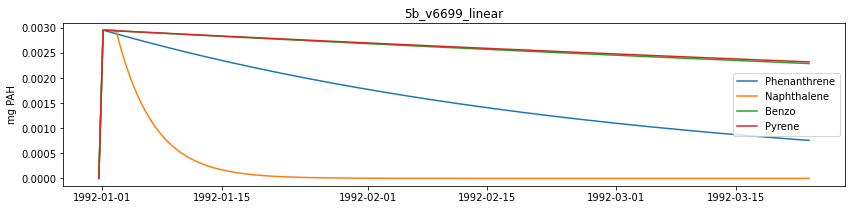

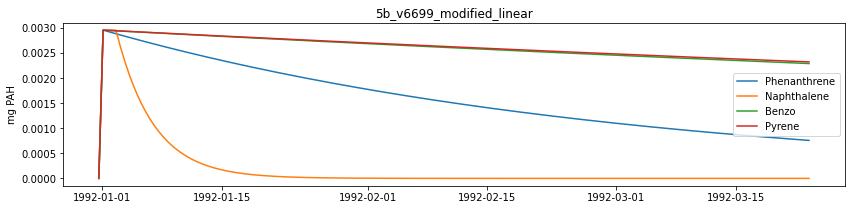

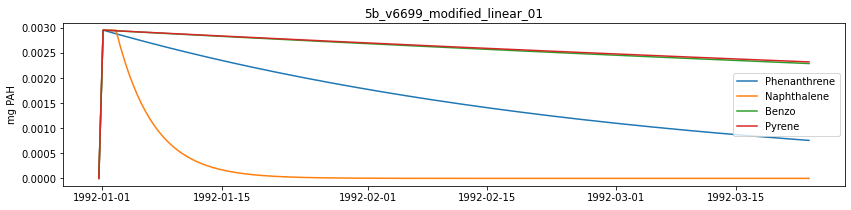

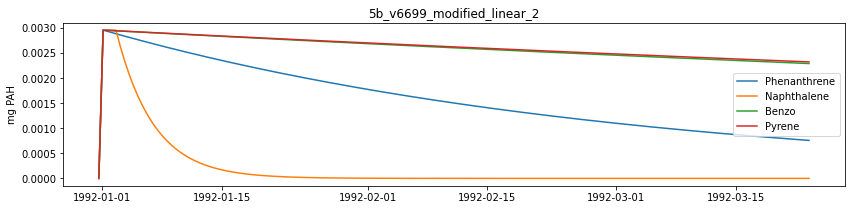

In [23]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    nm = path.parent.stem
    for pah in groups.pahs:
        contam_tbl = np.ma.filled(scenario.variables[pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
    ax.legend(groups.pahs)
    ax.set_ylabel('mg PAH')
    ax.set_title(nm)

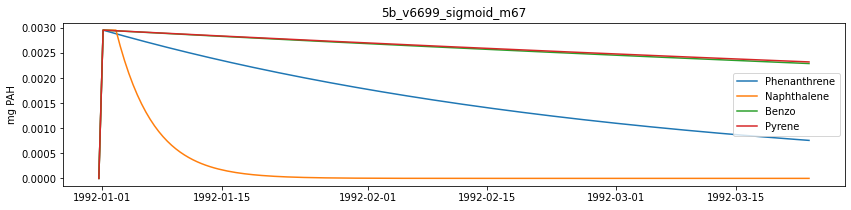

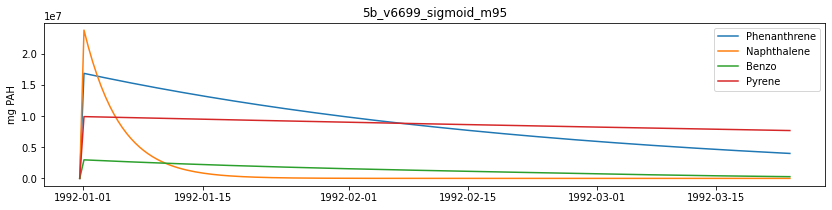

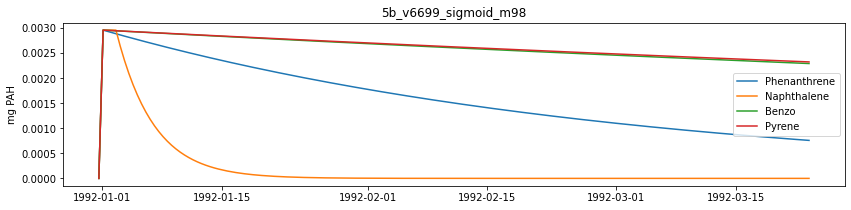

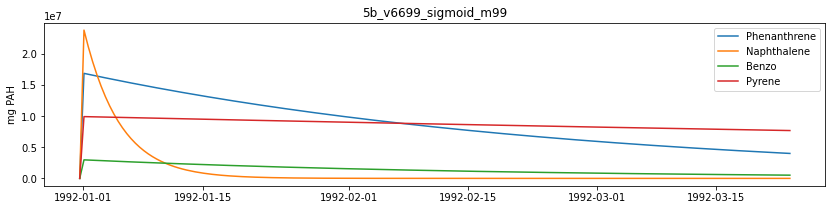

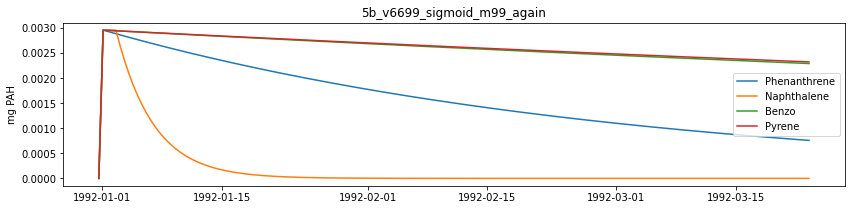

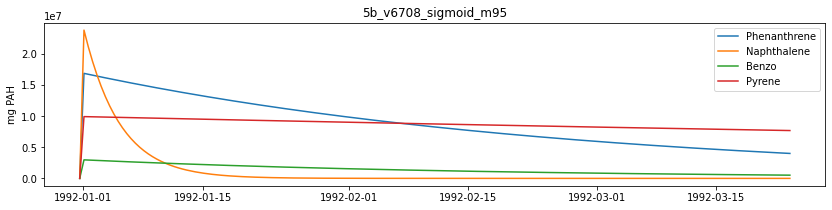

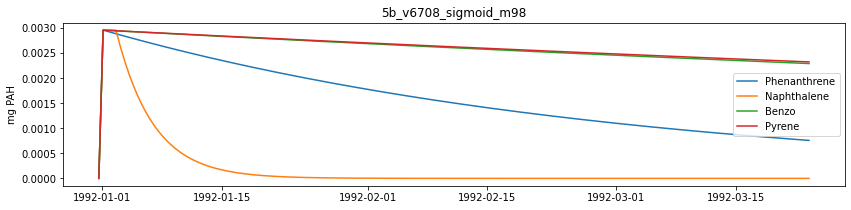

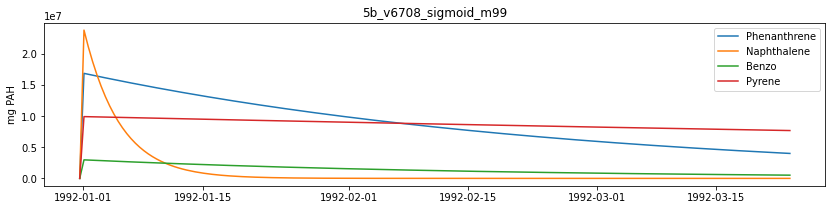

In [21]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    nm = path.parent.stem
    for pah in groups.pahs:
        contam_tbl = np.ma.filled(scenario.variables[pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
    ax.legend(groups.pahs)
    ax.set_ylabel('mg PAH')
    ax.set_title(nm)

In [21]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    print(path.parent.stem)
    print(scenario.variables['Naphthalene'].shape)

5b_v6699_sigmoid_m67
(181, 130, 7)
5b_v6699_sigmoid_m95
(181, 130, 7)
5b_v6699_sigmoid_m98
(181, 130, 7)
5b_v6699_sigmoid_m99
(181, 130, 7)
5b_v6708_sigmoid_m95
(168, 130, 7)
5b_v6708_sigmoid_m98
(181, 130, 7)
5b_v6708_sigmoid_m99
(181, 130, 7)


### Water Column

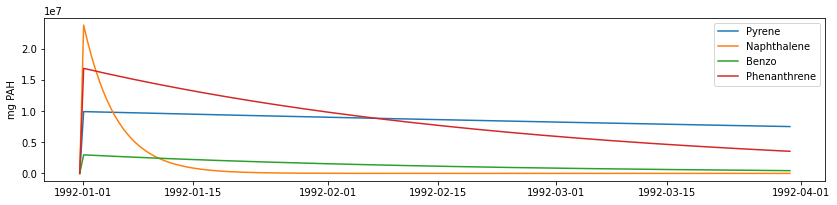

In [17]:
plot_pah(control, time)

### Plankton

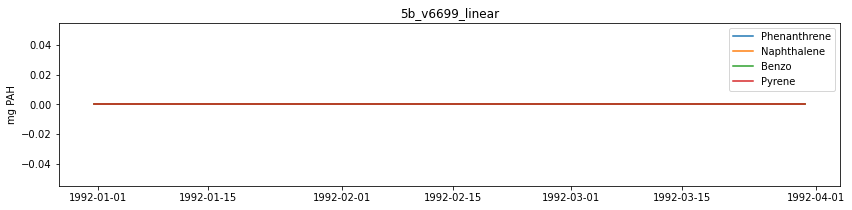

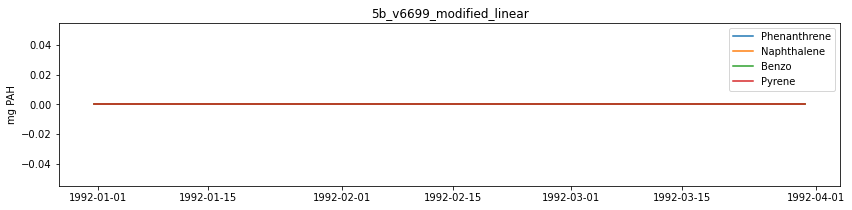

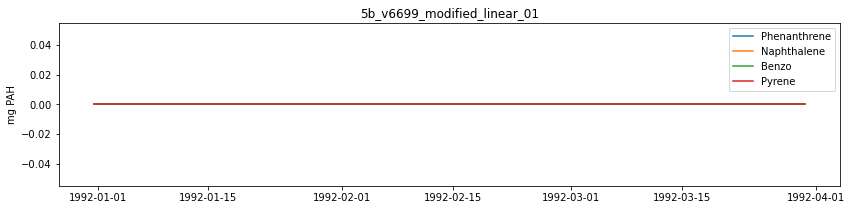

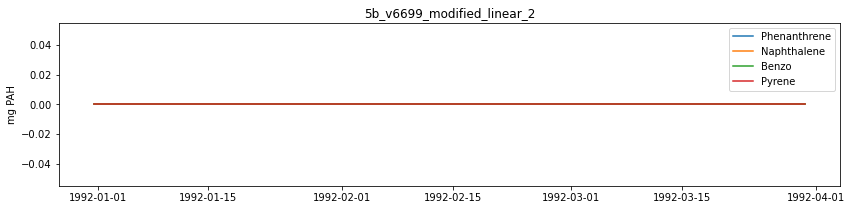

In [24]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    boxes = groups.salish_sea
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['Diatom'+'_' + pah][:,boxes,:], np.nan)
        volume_tbl = np.ma.filled(scenario.variables['volume'][:,boxes,:], np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time, contam_mass_t)
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

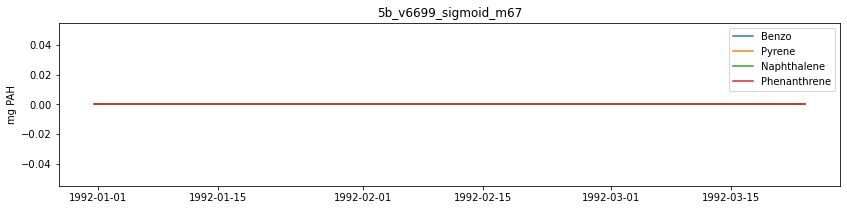

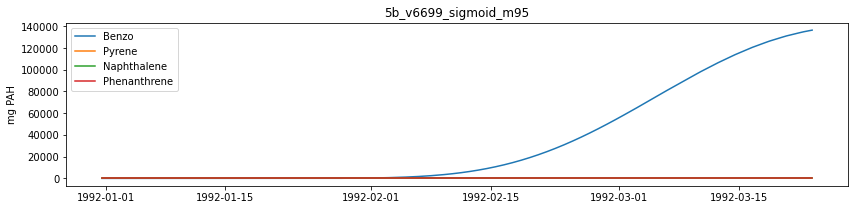

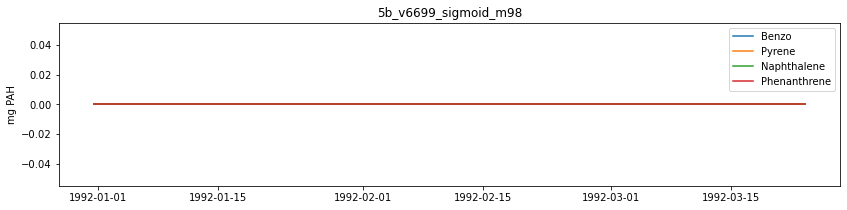

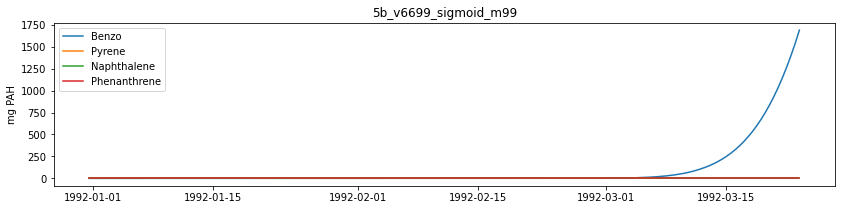

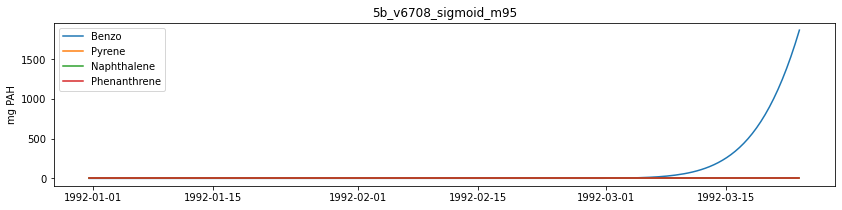

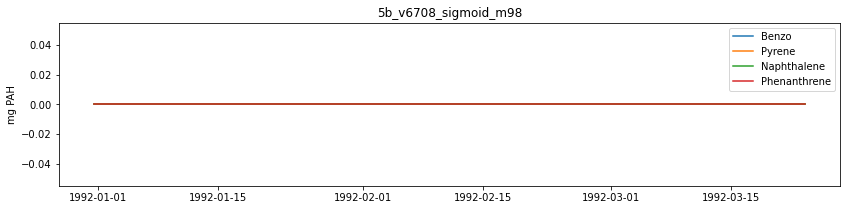

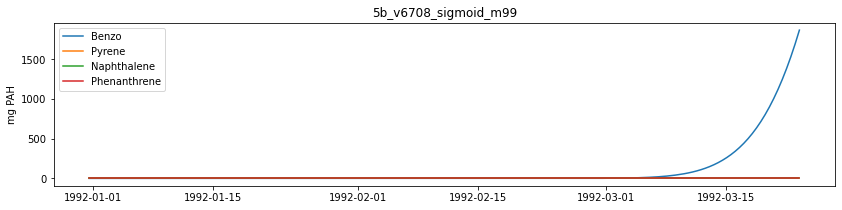

In [22]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['Diatom'+'_' + pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

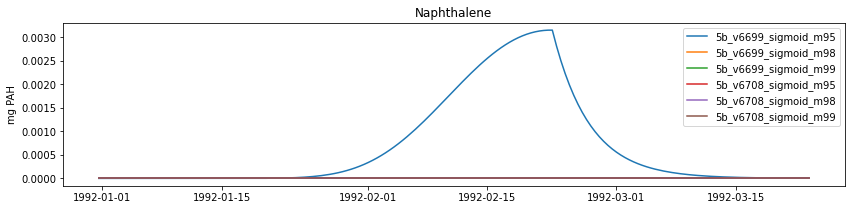

In [15]:
fig, ax = plt.subplots(figsize = (14,3))
names = []
pah = 'Naphthalene'
for scenario, path in zip(scenario_datasets, scenario_paths):
    nm = path.parent.stem
    names.append(nm)
    contam_tbl = np.ma.filled(scenario.variables['Diatom'+'_' + pah], np.nan)
    volume_tbl = np.ma.filled(scenario.volume, np.nan)
    contam_mass_tbl = contam_tbl * volume_tbl
    contam_mass_tb = contam_mass_tbl.sum(axis=2)
    contam_mass_t = contam_mass_tb.sum(axis=1)
    ax.plot(time[0:167], contam_mass_t[0:167])
    ax.legend(names)
    ax.set_ylabel('mg PAH')
    ax.set_title(pah, fontsize = 12)

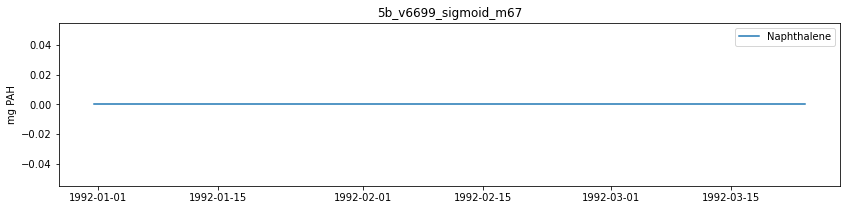

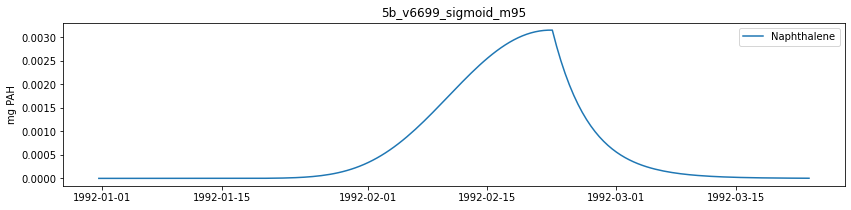

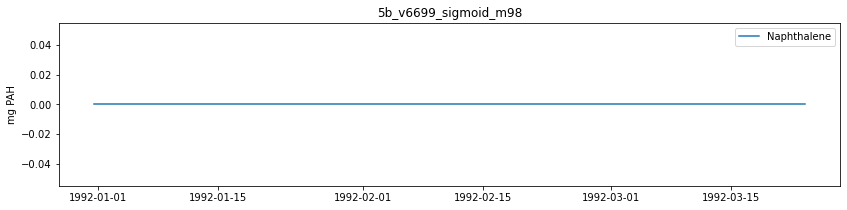

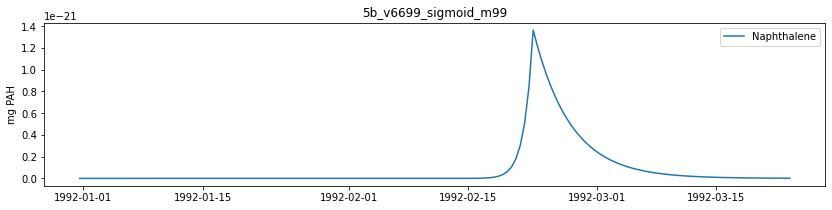

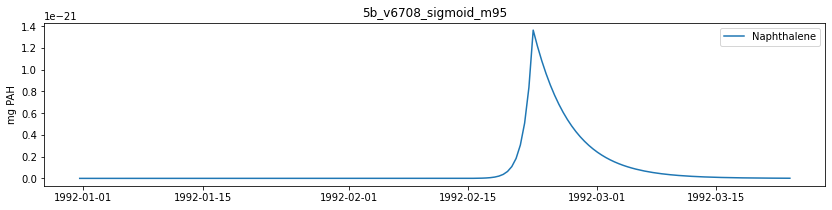

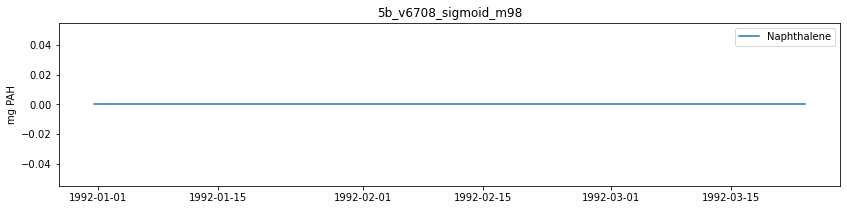

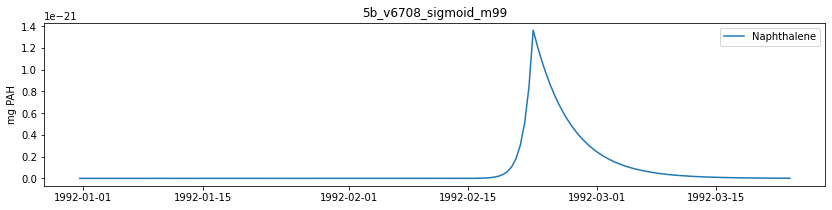

In [23]:
pah = 'Naphthalene'
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    nm = path.parent.stem
    contam_tbl = np.ma.filled(scenario.variables['Diatom'+'_' + pah], np.nan)
    volume_tbl = np.ma.filled(scenario.volume, np.nan)
    contam_mass_tbl = contam_tbl * volume_tbl
    contam_mass_tb = contam_mass_tbl.sum(axis=2)
    contam_mass_t = contam_mass_tb.sum(axis=1)
    ax.plot(time[0:167], contam_mass_t[0:167])
    ax.legend([pah])
    ax.set_ylabel('mg PAH')
    ax.set_title(nm, fontsize = 12)

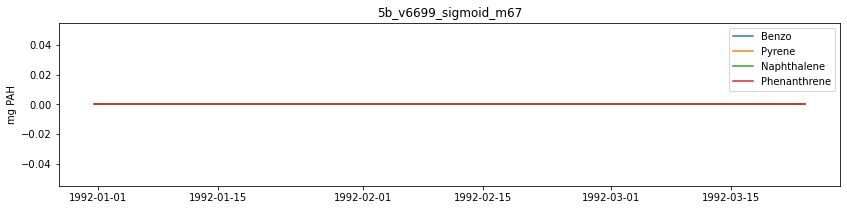

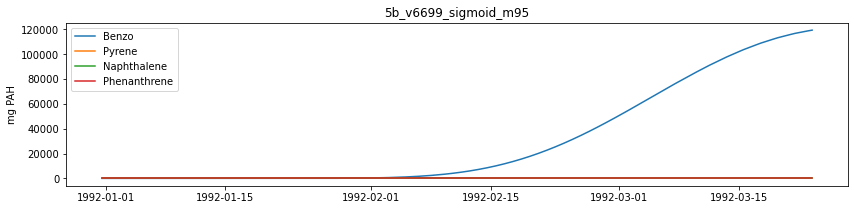

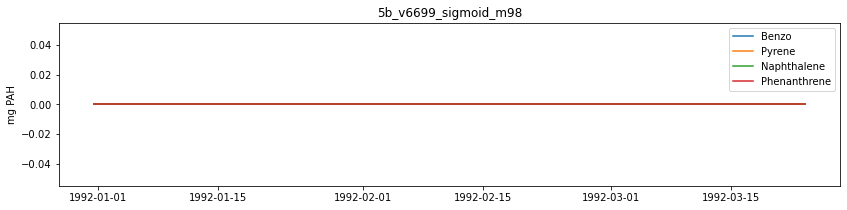

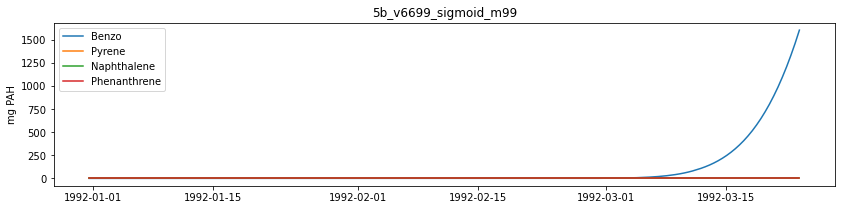

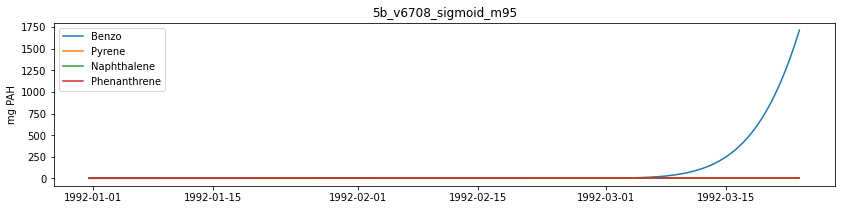

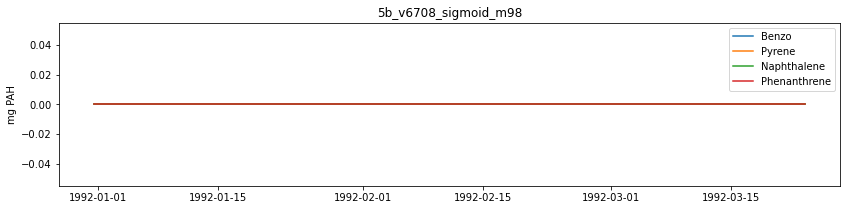

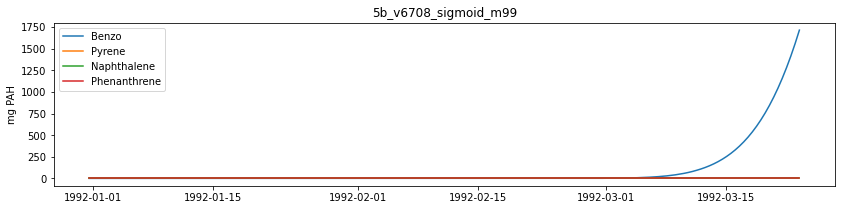

In [24]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['PicoPhytopl'+'_' + pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

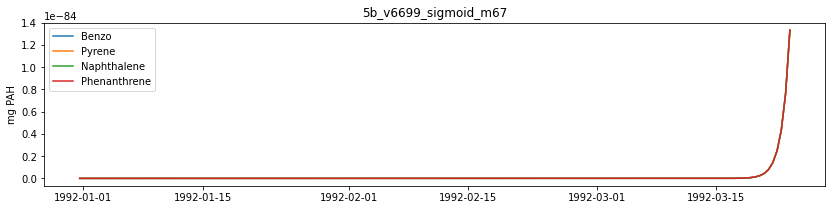

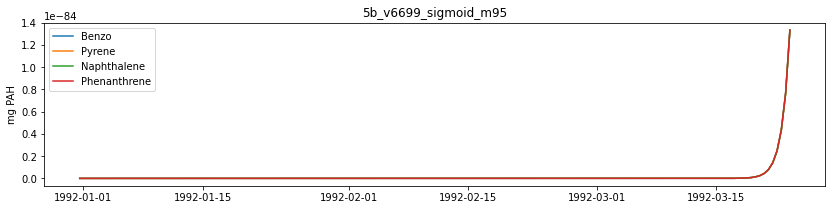

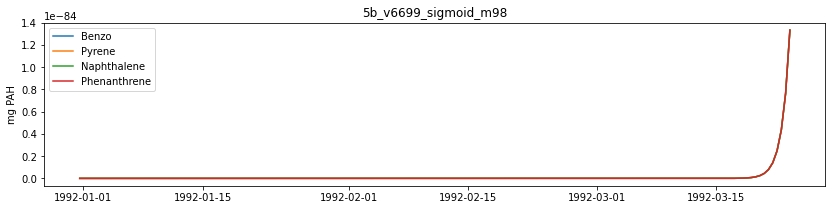

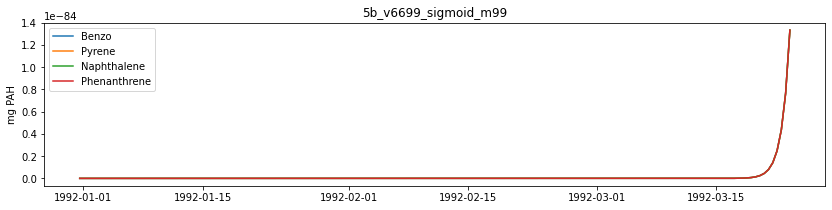

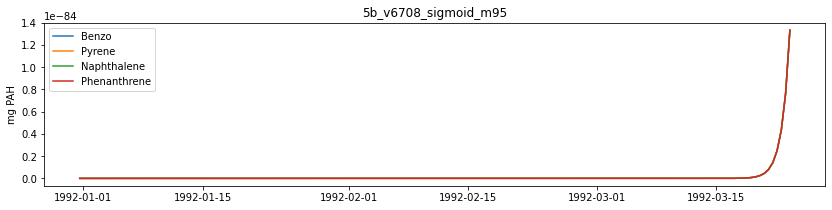

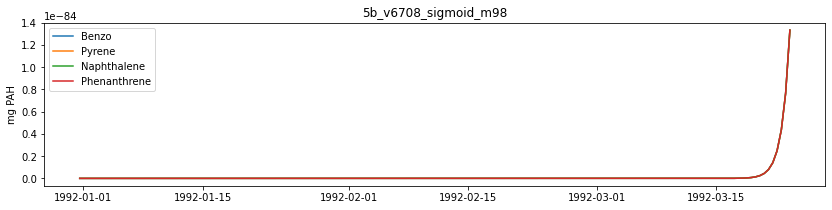

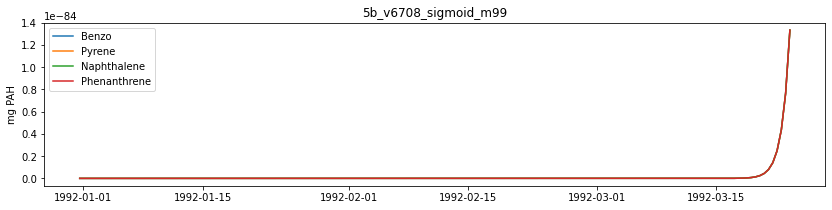

In [25]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    for pah in groups.pahs:    
        contam_tb = np.ma.filled(scenario.variables['Macroalgae'+'_' + pah], np.nan)
        contam_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_t[0:167])
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)